In [45]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Starten einer Spark Session
spark = SparkSession.builder \
    .appName("Emission Data Visualization") \
    .getOrCreate()

## Vorbereitung von Daten

In [46]:
emission_data = [{"2000": 464.972528567772, "2001": 470.133013625862, "2002": 409.771876603363, "2003": 355.593461528384, "2004": 311.225493974292, "2005": 272.136953998124, "2006": 227.528584604822, "2007": 194.499155724662, "2008": 184.55170027124, "2009": 154.911973034974, "2010": 137.215676347278, "2011": 128.747034707141, "2012": 131.002449224655, "2013": 127.390600538148, "2014": 117.411407668618, "2015": 108.623840644296, "2016": 90.3129052678576, "2017": 85.0779201091475, "2018": 76.0917499116289, "2019": 71.2990178322923, "2020": 66.4987898133564, "2021": 60.6416771923102, "2022": 56.728338323236}]

In [47]:
pdf = pd.DataFrame(emission_data)

In [48]:
sdf = spark.createDataFrame(pdf)

In [49]:
sdf.show()

+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+
|            2000|            2001|            2002|            2003|            2004|            2005|            2006|            2007|           2008|            2009|            2010|            2011|            2012|            2013|            2014|            2015|            2016|            2017|            2018|            2019|            2020|            2021|           2022|
+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+---------------+----------------+----------------+----------------+--------------

In [50]:
pdf_viz = sdf.toPandas()

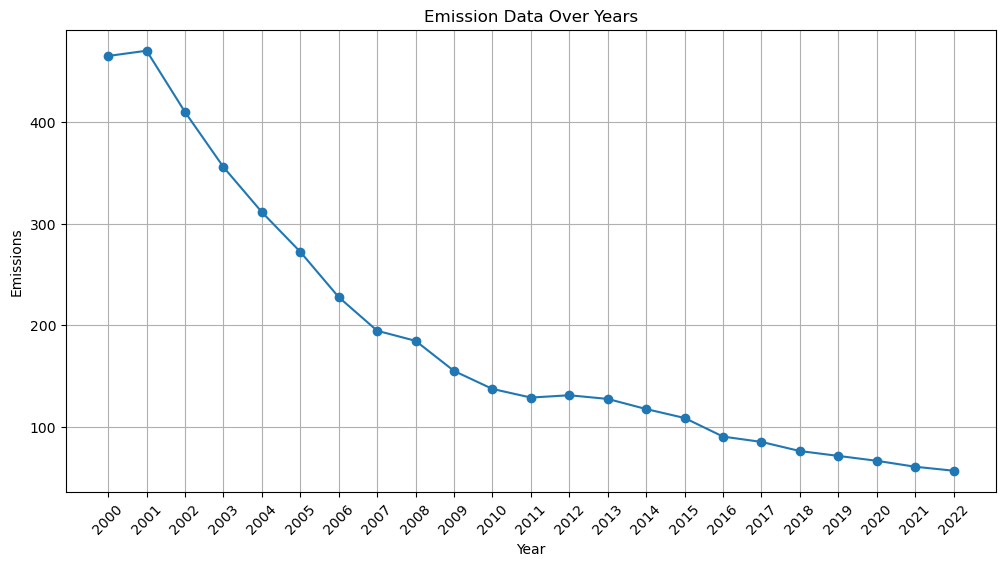

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(pdf_viz.columns, pdf_viz.iloc[0], marker='o')
plt.title('Emission Data Over Years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [52]:
file_path = "newcars/overalldata_new.csv"
df = spark.read.csv(file_path, header=False, inferSchema=True)

In [53]:
df.printSchema()
df.show(5)

columns = ['Column1', 'C-A10-0', 'Column3', 'NewCars']
df = df.toDF(*columns)

df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: integer (nullable = true)

+-------+----------+-----+---+
|    _c0|       _c1|  _c2|_c3|
+-------+----------+-----+---+
|J59-225|A10-200805|EK7-1|  5|
|J59-225|A10-200806|EK7-1|  4|
|J59-225|A10-200807|EK7-1| 20|
|J59-225|A10-200808|EK7-1| 15|
|J59-225|A10-200809|EK7-1| 11|
+-------+----------+-----+---+
only showing top 5 rows

+-------+----------+-------+-------+
|Column1|   C-A10-0|Column3|NewCars|
+-------+----------+-------+-------+
|J59-225|A10-200805|  EK7-1|      5|
|J59-225|A10-200806|  EK7-1|      4|
|J59-225|A10-200807|  EK7-1|     20|
|J59-225|A10-200808|  EK7-1|     15|
|J59-225|A10-200809|  EK7-1|     11|
|J59-225|A10-200810|  EK7-1|     38|
|J59-225|A10-200811|  EK7-1|     28|
|J59-225|A10-200812|  EK7-1|     13|
|J59-209|A10-200807|  EK7-1|      1|
|J59-209|A10-202211|  EK7-1|      1|
|  J59-3|A10-200001|  EK7-1|    336|
|  J59-3|A10-200002|  EK7-1|   

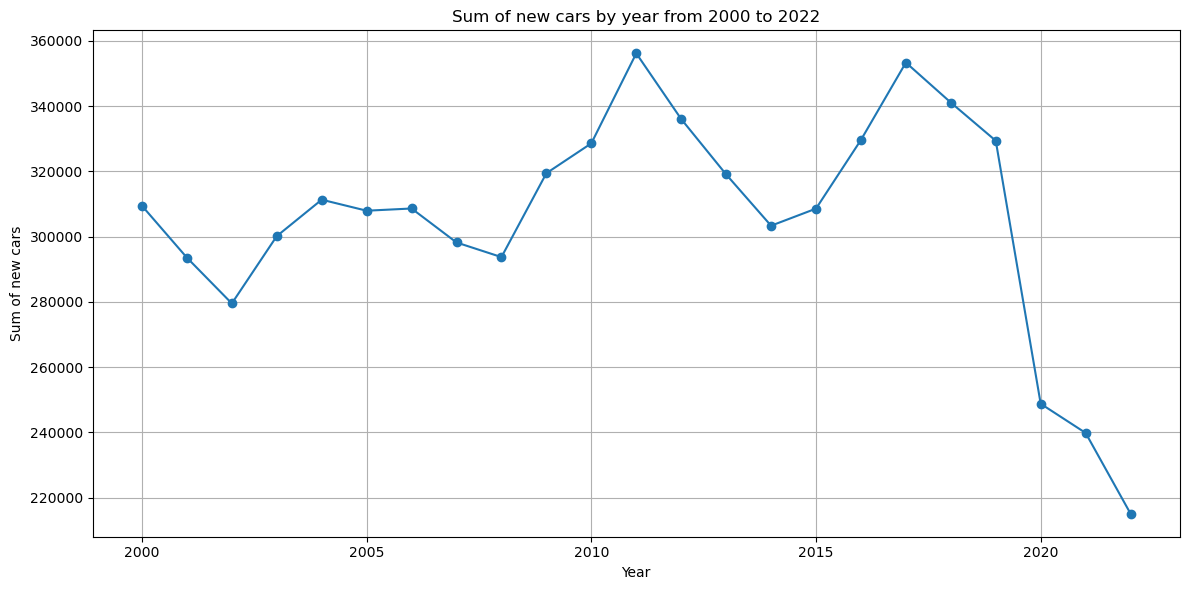

+----+------+
|Year|   Sum|
+----+------+
|2000|309427|
|2001|293528|
|2002|279493|
|2003|300121|
|2004|311292|
|2005|307915|
|2006|308594|
|2007|298182|
|2008|293697|
|2009|319403|
|2010|328563|
|2011|356145|
|2012|336010|
|2013|319035|
|2014|303318|
|2015|308555|
|2016|329604|
|2017|353320|
|2018|341068|
|2019|329363|
+----+------+
only showing top 20 rows



In [54]:
pdf = df.toPandas()

pdf.head()

pdf['Year'] = pdf['C-A10-0'].str[4:8].astype(int)

pdf['NewCars'] = pd.to_numeric(pdf['NewCars'], errors='coerce')

pdf = pdf.dropna(subset=['NewCars'])

yearly_sum = pdf.groupby('Year')['NewCars'].sum().reset_index()
yearly_sum.columns = ['Year', 'Sum']

filtered_data = yearly_sum[(yearly_sum['Year'] >= 2000) & (yearly_sum['Year'] <= 2022)]

if not filtered_data.empty:
    # Plotten der Daten
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Year'], filtered_data['Sum'], marker='o')
    plt.title('Sum of new cars by year from 2000 to 2022')
    plt.xlabel('Year')
    plt.ylabel('Sum of new cars')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    filtered_sdf = spark.createDataFrame(filtered_data)

    filtered_sdf.show()
else:
    print("Keine Daten für die angegebenen Jahre 2000 bis 2022 gefunden.")


In [55]:
emission_df = pd.DataFrame(emission_data).T
emission_df.columns = ['Emissions']
emission_df.index.name = 'Year'
emission_df.reset_index(inplace=True)
emission_df['Year'] = emission_df['Year'].astype(int)

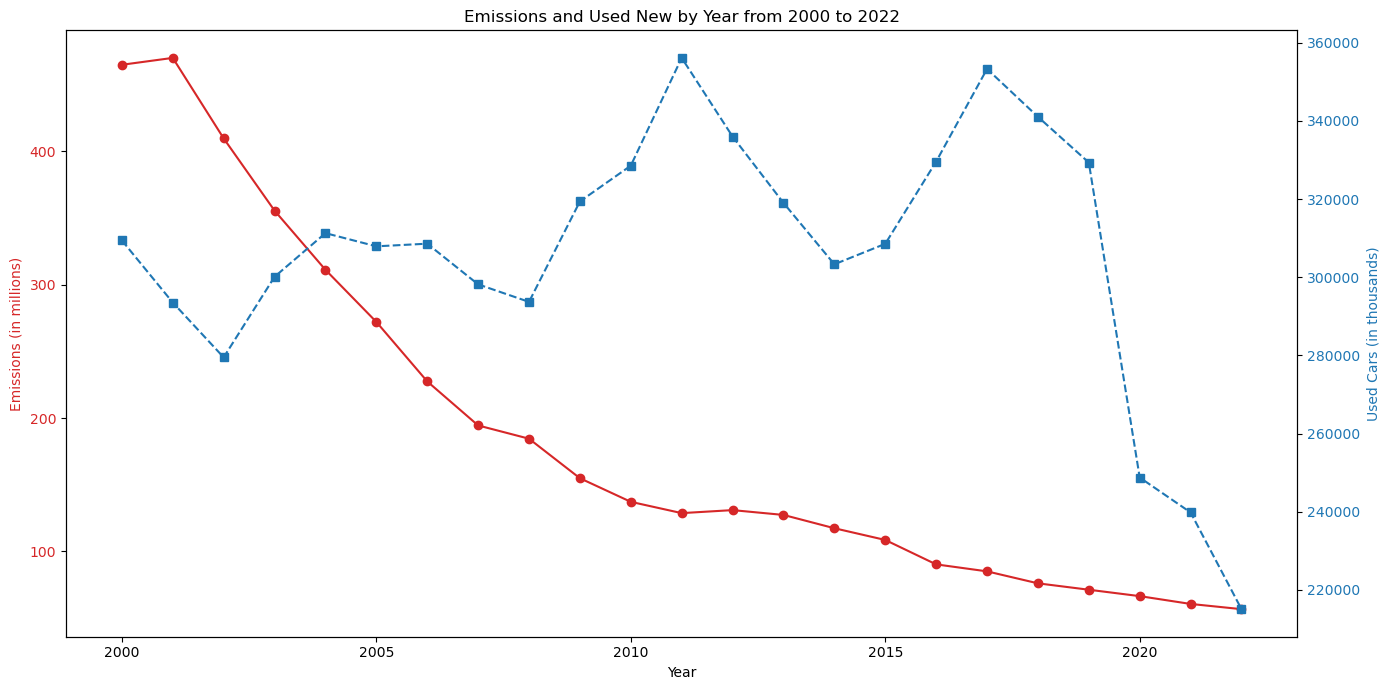

In [56]:
combined_df = pd.merge(emission_df, filtered_data, on='Year', how='inner')

# Plotten der Daten
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Emissions (in millions)', color=color)
ax1.plot(combined_df['Year'], combined_df['Emissions'], color=color, marker='o', linestyle='-', label='Emissions (in millions)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Used Cars (in thousands)', color=color)
ax2.plot(combined_df['Year'], combined_df['Sum'], color=color, marker='s', linestyle='--', label='New Cars (in thousands)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Emissions and Used New by Year from 2000 to 2022')
fig.tight_layout()
plt.show()

In [57]:
file_path = "usedcars/overalldata_used.csv"
df = spark.read.csv(file_path, header=False, inferSchema=True)

columns = ['Column1', 'C-A10-0', 'Column3', 'UsedCars']
df = df.toDF(*columns)

pdf = df.toPandas()

pdf['Year'] = pdf['C-A10-0'].str[4:8].astype(int)

pdf['UsedCars'] = pd.to_numeric(pdf['UsedCars'], errors='coerce')

pdf = pdf.dropna(subset=['UsedCars'])

yearly_sum = pdf.groupby('Year')['UsedCars'].sum().reset_index()
yearly_sum.columns = ['Year', 'Sum']

filtered_data = yearly_sum[(yearly_sum['Year'] >= 2000) & (yearly_sum['Year'] <= 2022)]


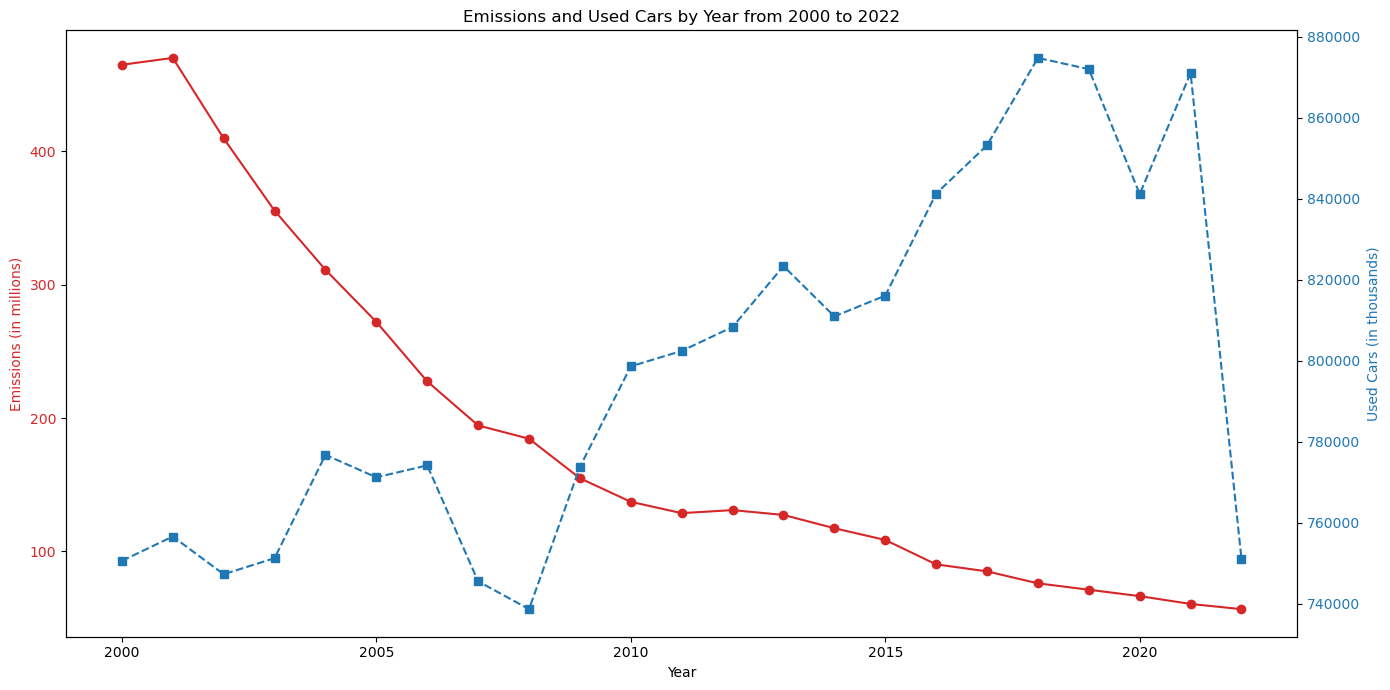

In [58]:
combined_df = pd.merge(emission_df, filtered_data, on='Year', how='inner')

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Emissions (in millions)', color=color)
ax1.plot(combined_df['Year'], combined_df['Emissions'], color=color, marker='o', linestyle='-', label='Emissions (in millions)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Used Cars (in thousands)', color=color)
ax2.plot(combined_df['Year'], combined_df['Sum'], color=color, marker='s', linestyle='--', label='Used Cars (in thousands)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Emissions and Used Cars by Year from 2000 to 2022')
fig.tight_layout()
plt.show()


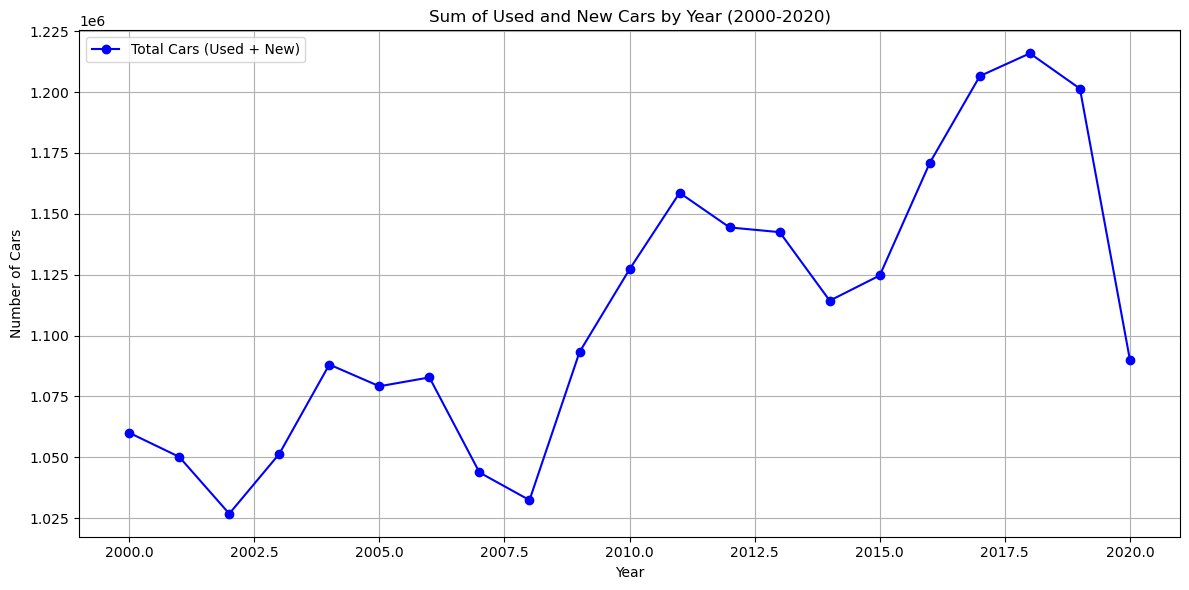

In [61]:
used_cars_path = 'usedcars/overalldata_used.csv'
used_cars_df = pd.read_csv(used_cars_path, header=None, names=['Column1', 'C-A10-0', 'Column3', 'UsedCars'])

new_cars_path = 'newcars/overalldata_new.csv'
new_cars_df = pd.read_csv(new_cars_path, header=None, names=['Column1', 'C-A10-0', 'Column3', 'NewCars'])

used_cars_df['Year'] = used_cars_df['C-A10-0'].str[4:8].astype(int)
used_cars_df['UsedCars'] = pd.to_numeric(used_cars_df['UsedCars'], errors='coerce')

new_cars_df['Year'] = new_cars_df['C-A10-0'].str[4:8].astype(int)
new_cars_df['NewCars'] = pd.to_numeric(new_cars_df['NewCars'], errors='coerce')

used_cars_df = used_cars_df[(used_cars_df['Year'] >= 2000) & (used_cars_df['Year'] <= 2020)]
new_cars_df = new_cars_df[(new_cars_df['Year'] >= 2000) & (new_cars_df['Year'] <= 2020)]

used_cars_sum = used_cars_df.groupby('Year')['UsedCars'].sum().reset_index()
new_cars_sum = new_cars_df.groupby('Year')['NewCars'].sum().reset_index()

combined_df = pd.merge(used_cars_sum, new_cars_sum, on='Year')

combined_df['TotalCars'] = combined_df['UsedCars'] + combined_df['NewCars']

plt.figure(figsize=(12, 6))
plt.plot(combined_df['Year'], combined_df['TotalCars'], marker='o', color='b', label='Total Cars (Used + New)')
plt.title('Sum of Used and New Cars by Year (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
spark.stop()